Qual a ação: vale3
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-11,110.190002,110.500000,109.260002,109.269997,109.269997,14680600
2021-08-12,109.199997,109.980003,108.830002,109.199997,109.199997,14849500
2021-08-13,109.699997,109.900002,107.959999,108.300003,108.300003,11855200
2021-08-16,107.239998,108.900002,105.919998,108.800003,108.800003,21856700
2021-08-17,108.110001,109.320000,105.660004,107.000000,107.000000,23402600


Indicadores Adicionados


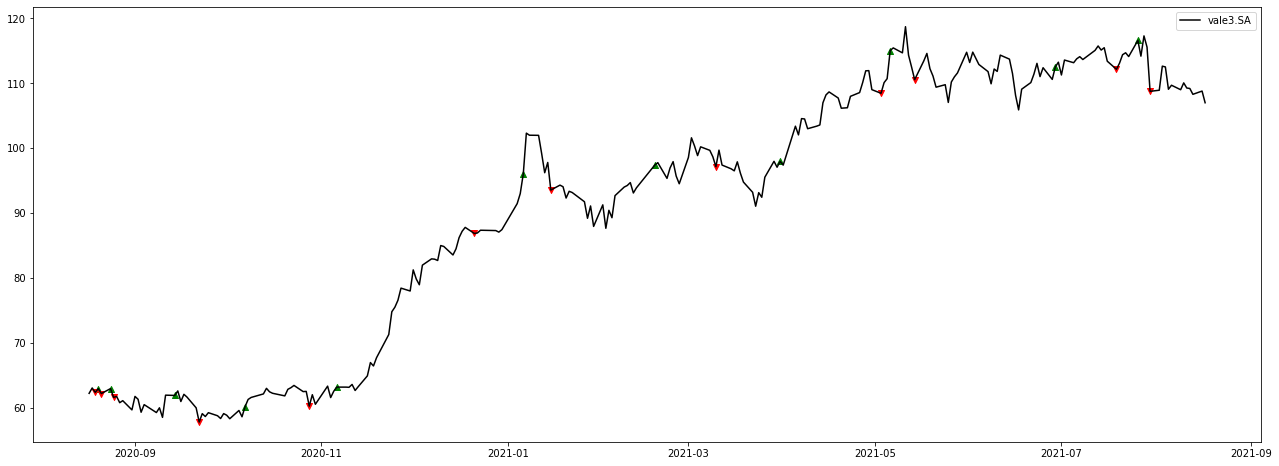

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

ticker = input(f'Qual a ação: ') + '.SA'
df = yf.download(ticker, period='1y')
display(df.tail())


def MACD(df):
    df['EMA12'] = df.Close.ewm(span=12).mean()
    df['EMA26'] = df.Close.ewm(span=26).mean()
    df['MACD'] = df.EMA12 - df.EMA26
    df['signal'] = df.MACD.ewm(span=9).mean()
    print('Indicadores Adicionados')

MACD(df)

Buy, Sell = [], []

for i in range(2,len(df)):
    if df.MACD.iloc[i] > df.signal.iloc[i] and df.MACD.iloc[i-1] < df.signal.iloc[i-1]:
        Buy.append(i)
    elif df.MACD.iloc[i] < df.signal.iloc[i] and df.MACD.iloc[i-1] > df.signal.iloc[i-1]:
        Sell.append(i)

plt.figure(figsize=(22,8))
plt.scatter(df.iloc[Buy].index, df.iloc[Buy].Close, marker="^", color='green')
plt.scatter(df.iloc[Sell].index, df.iloc[Sell].Close, marker="v", color='red')
plt.plot(df.Close, label= ticker, color='k')
plt.legend()
plt.show()


In [2]:
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-08-17   61.779999   62.599998   61.150002   62.230000   56.051147   
2020-08-18   63.299999   63.700001   62.849998   63.060001   56.798733   
2020-08-19   63.410000   63.880001   62.330002   62.389999   56.195263   
2020-08-20   61.820000   63.500000   61.669998   62.950001   56.699654   
2020-08-21   62.410000   62.790001   61.509998   62.200001   56.024128   
...                ...         ...         ...         ...         ...   
2021-08-11  110.190002  110.500000  109.260002  109.269997  109.269997   
2021-08-12  109.199997  109.980003  108.830002  109.199997  109.199997   
2021-08-13  109.699997  109.900002  107.959999  108.300003  108.300003   
2021-08-16  107.239998  108.900002  105.919998  108.800003  108.800003   
2021-08-17  108.110001  109.320000  105.660004  107.000000  107.000000   

              Volume       EMA12     